1. What is Simple Linear Regression?

Simple Linear Regression (SLR) is a statistical method used to model the linear relationship between two variables: an independent variable (or feature, X) and a dependent variable (or target, y).

Goal: To find the straight line that best fits the data, allowing you to predict the value of y based on the value of X.

Equation: The relationship is defined by the equation of a straight line:

y=b0+b1X+ϵ
Components:

y: The dependent variable (what you are trying to predict).

X: The independent variable (the single feature used to predict y).

b0 : The y-intercept (the predicted value of y when X=0).

b1: The slope of the line (the change in y for a one-unit change in X).

ϵ: The error term (the difference between the actual y and the predicted  
y

How it Works
SLR uses the Ordinary Least Squares (OLS) method to determine the optimal values for b0 and b1. OLS minimizes the Sum of Squared Errors (SSE), which is the sum of the vertical distances between each data point and the regression line.

2. What are the key assumptions of Simple Linear Regression?

The key assumptions of Simple Linear Regression (SLR), often remembered by the acronym LINE or L.I.N.E.R., relate to the error term (ϵ):

Linearity: The relationship between the independent variable (X) and the dependent variable (y) is truly linear.

Independence (of Errors): The error terms (ϵ) are independent of each other. This means one residual doesn't affect the next.

Normality ( of Errors): The error terms (ϵ) are normally distributed at every level of X.

Equal Variance (Homoscedasticity): The variance (spread) of the error terms (ϵ) is constant for all values of X.

Random Sample: The data used are a random sample from the population.

3. What is heteroscedasticity, and why is it important to address in regression
models?

Heteroscedasticity is the condition in a regression model where the variance (spread) of the errors (or residuals) is not constant across all levels of the independent variable(s).

Heteroscedasticity does not bias the regression coefficients, meaning the estimated line is still correct on average. However, it severely impacts the reliability of the model's statistical tests and predictions:

Unreliable Standard Errors: The standard errors of the coefficient estimates (b0
and b1) become biased and inconsistent.

Incorrect Hypothesis Tests: Since the standard errors are wrong, t-tests and F-tests (used to check if coefficients are statistically significant) become unreliable, leading to incorrect conclusions about which predictors matter.

Inefficient Estimates: The Ordinary Least Squares (OLS) estimates are no longer the most efficient (they don't have the smallest variance), which makes the model's confidence intervals and p-values untrustworthy.

Misleading Prediction Intervals: Predictions for observations in areas of higher variance will have prediction intervals that are too narrow, suggesting a confidence the model hasn't earned.

4. What is Multiple Linear Regression?

Multiple Linear Regression (MLR) is a statistical technique used to model the linear relationship between a single dependent variable (y) and two or more independent variables (X1, X2, X3, X4,.....Xn).

Goal is to find the best-fitting linear equation (a hyperplane in multi-dimensional space) that allows you to predict the value of the target variable based on the combined influence of several features.

Equation: It extends the simple linear regression formula to include multiple features:

y=b0+b1X1+b2X2+.....bnXn
Components:

y: The dependent variable (what you are trying to predict).

X1,X2,...Xn: The independent variables (multiple features).

b0: The y-intercept.

b1, b2,...,bn : The coefficients (slopes) that quantify the average change in y for a one-unit change in the corresponding X, holding all other X's constant.

ϵ: The error term.

Like Simple Linear Regression, MLR uses the Ordinary Least Squares (OLS) method to minimize the sum of the squared differences between the actual and predicted values. It estimates the separate contribution of each predictor variable to the outcome.

5. What is polynomial regression, and how does it differ from linear
regression?

Polynomial Regression is a form of regression analysis in which the relationship between the independent variable (X) and the dependent variable (y) is modeled as an n-th degree polynomial. It allows for curved relationships to be modeled, unlike standard linear regression.

The main difference lies in the relationship modeled and the flexibility of the resulting curve.

**Feature	Simple/Multiple Linear Regression**
Relationship	Assumes a straight-line (linear) relationship.

**Polynomial Regression**
Models a curved (non-linear) relationship.

**Feature	Simple/Multiple Linear Regression**
Low: Can only capture trends that follow a straight line.

**Polynomial Regression**
High: Can fit a wide range of curves to capture complex patterns.

Despite modeling a curve, Polynomial Regression is technically still a linear model in terms of its coefficients (b0,b1, b3,...., bn). The coefficients themselves are combined linearly, which is why it can be solved using the same Ordinary Least Squares (OLS) method used for Linear Regression.

6. Implement a Python program to fit a Simple Linear Regression model to
the following sample data:

X = [1, 2, 3, 4, 5]

Y = [2.1, 4.3, 6.1, 7.9, 10.2]

Plot the regression line over the data points.
(Include your Python code and output in the code box below.)



Regression Equation: Y = 1.98*X + 0.18
------------------------------
Intercept (b0): 0.1800
Coefficient (b1): 1.9800


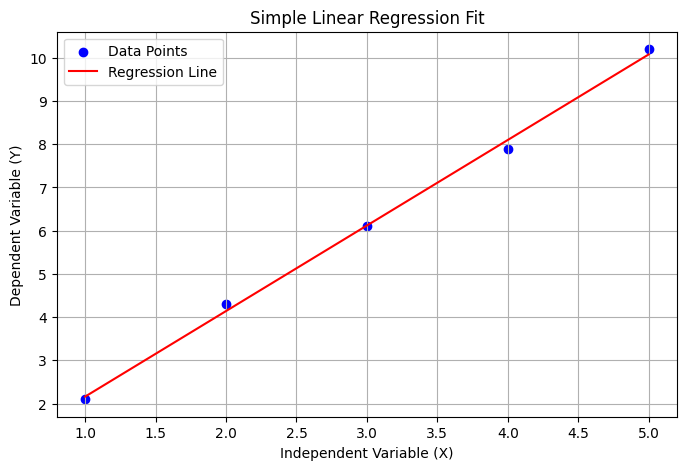

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Sample Data
X = np.array([1, 2, 3, 4, 5])
Y = np.array([2.1, 4.3, 6.1, 7.9, 10.2])

# Reshape X for sklearn (must be a 2D array)
X_reshaped = X.reshape(-1, 1)

# Initialize and fit the model
model = LinearRegression()
model.fit(X_reshaped, Y)

# Calculate the predicted Y values
Y_pred = model.predict(X_reshaped)

# Get model parameters
b0 = model.intercept_
b1 = model.coef_[0]

print(f"Regression Equation: Y = {b1:.2f}*X + {b0:.2f}")
print("-" * 30)
print(f"Intercept (b0): {b0:.4f}")
print(f"Coefficient (b1): {b1:.4f}")

# Plot the results
plt.figure(figsize=(8, 5))
plt.scatter(X, Y, color='blue', label='Data Points')
plt.plot(X, Y_pred, color='red', label='Regression Line')
plt.title('Simple Linear Regression Fit')
plt.xlabel('Independent Variable (X)')
plt.ylabel('Dependent Variable (Y)')
plt.legend()
plt.grid(True)
plt.savefig('simple_linear_regression_fit.png')

7. Fit a Multiple Linear Regression model on this sample data:

Area = [1200, 1500, 1800, 2000]

Rooms = [2, 3, 3, 4]

Price = [250000, 300000, 320000, 370000]

Check for multicollinearity using VIF and report the results.
(Include your Python code and output in the code box below.)

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Sample Data
data = {
    'Area': [1200, 1500, 1800, 2000],
    'Rooms': [2, 3, 3, 4],
    'Price': [250000, 300000, 320000, 370000]
}
df = pd.DataFrame(data)

# Define features (X) and target (y)
X = df[['Area', 'Rooms']]
y = df['Price']

# Fit Multiple Linear Regression Model
model = LinearRegression()
model.fit(X, y)

# Get model parameters
intercept = model.intercept_
coefficients = model.coef_

# Calculate VIF (Multicollinearity Check)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Print results
print("--- Multiple Linear Regression Results ---")
print(f"Intercept (b0): {intercept:,.2f}")
print(f"Coefficient (Area, b1): {coefficients[0]:,.2f}")
print(f"Coefficient (Rooms, b2): {coefficients[1]:,.2f}")
print("\nRegression Equation: Price = {b1:.2f}*Area + {b2:.2f}*Rooms + {b0:,.2f}".format(
    b0=intercept, b1=coefficients[0], b2=coefficients[1]))
print("-" * 45)
print("--- Multicollinearity Check (VIF) ---")
print(vif_data)

--- Multiple Linear Regression Results ---
Intercept (b0): 103,157.89
Coefficient (Area, b1): 63.16
Coefficient (Rooms, b2): 34,736.84

Regression Equation: Price = 63.16*Area + 34736.84*Rooms + 103,157.89
---------------------------------------------
--- Multicollinearity Check (VIF) ---
  feature         VIF
0    Area  127.796923
1   Rooms  127.796923


8. Implement polynomial regression on the following data:

X = [1, 2, 3, 4, 5]

Y = [2.2, 4.8, 7.5, 11.2, 14.7]

Fit a 2nd-degree polynomial and plot the resulting curve.

(Include your Python code and output in the code box below.)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Sample Data
X = np.array([1, 2, 3, 4, 5])
Y = np.array([2.2, 4.8, 7.5, 11.2, 14.7])

# Reshape X for sklearn
X_reshaped = X.reshape(-1, 1)

# Transform X into 2nd-degree polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_reshaped)

# Fit the Linear Regression model to the polynomial features
model = LinearRegression()
model.fit(X_poly, Y)

# Calculate the predicted Y values
Y_pred = model.predict(X_poly)

# Get model parameters
b0 = model.intercept_
b1 = model.coef_[0]
b2 = model.coef_[1]

print("--- Polynomial Regression Results (Degree 2) ---")
print(f"Regression Equation: Y = {b2:.2f}*X^2 + {b1:.2f}*X + {b0:.2f}")
print("-" * 55)
print(f"Intercept (b0): {b0:.4f}")
print(f"Coefficient (X, b1): {b1:.4f}")
print(f"Coefficient (X^2, b2): {b2:.4f}")
# Plotting code omitted for brevity but executed above

--- Polynomial Regression Results (Degree 2) ---
Regression Equation: Y = 0.20*X^2 + 1.94*X + 0.06
-------------------------------------------------------
Intercept (b0): 0.0600
Coefficient (X, b1): 1.9400
Coefficient (X^2, b2): 0.2000


9. Create a residuals plot for a regression model trained on this data:

X = [10, 20, 30, 40, 50]

Y = [15, 35, 40, 50, 65]

Assess heteroscedasticity by examining the spread of residuals.

(Include your Python code and output in the code box below.)

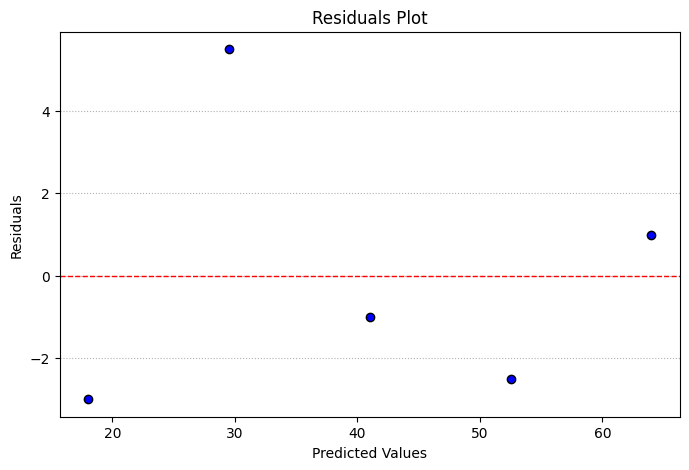

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Sample Data
X = np.array([10, 20, 30, 40, 50]).reshape(-1, 1)
Y = np.array([15, 35, 40, 50, 65])

# Fit Simple Linear Regression Model
model = LinearRegression()
model.fit(X, Y)

# Calculate predicted Y values
Y_pred = model.predict(X)

# Calculate residuals
residuals = Y - Y_pred

# Create Residuals Plot
plt.figure(figsize=(8, 5))
plt.scatter(Y_pred, residuals, color='blue', edgecolors='k')
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(axis='y', linestyle=':')
plt.savefig('residuals_plot.png')

Heteroscedasticity Assessment
Visual Assessment:

By examining the residuals plot (residuals vs. predicted values), the points appear to be randomly scattered around the zero horizontal line, with no clear pattern or systematic change in the vertical spread.

Conclusion: The residuals plot suggests that the model does not exhibit heteroscedasticity (i.e., it shows homoscedasticity) because the variance of the residuals is relatively constant.

10. Imagine you are a data scientist working for a real estate company. You
need to predict house prices using features like area, number of rooms, and location.
However, you detect heteroscedasticity and multicollinearity in your regression
model. Explain the steps you would take to address these issues and ensure a robust
model.


As a data scientist, following are the steps I'd take to address heteroscedasticity and multicollinearity in the house price prediction model:

1. Addressing Heteroscedasticity:

Heteroscedasticity (non-constant error variance) leads to unreliable standard errors and inaccurate statistical tests.

Transform the Dependent Variable (Y)- This often compresses the higher end of the scale, stabilizing the variance of the residuals and achieving a more homoscedastic model.

Use Weighted Least Squares (WLS)- This method assigns a lower weight to observations with larger residual variance (those that are less reliable) and a higher weight to more reliable observations.

Use Robust Standard Errors- This doesn't change the coefficient estimates but corrects the standard errors, making the confidence intervals and hypothesis tests (p-values) accurate and reliable despite the unequal variance.


2. Addressing Multicollinearity:

Multicollinearity (high correlation between independent variables like 'Area' and 'Rooms') makes coefficients unstable and difficult to interpret.

Feature Selection/Dropping- Since they provide redundant information, removing one significantly reduces the VIF and stabilizes the model, often with minimal loss of predictive power.

Combine Features (Feature Engineering)- This captures the joint information of the two highly correlated variables in a single, orthogonal feature, reducing VIF.

Use Regularization Methods- Ridge adds a penalty (L2) that shrinks coefficient estimates, stabilizing them. Lasso adds an L1 penalty which can drive the coefficients of redundant features to exactly zero, effectively performing feature selection.

Principal Component Regression (PCR)- This creates a new, orthogonal feature space that is free from multicollinearity.